# Import dataset and packages

In [31]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os

In [3]:
product=pd.read_csv('C:/Users/YufeiLu/Downloads/PRODUCTS_TAKEHOME.csv')
product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


# Check datatypes and change if necessary

In [6]:
product.dtypes
## Barcode should be string

CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

In [5]:
# Better to convert BARCODE to str type in case there's potential leading zero or non-numerical characters.
product['BARCODE']=product['BARCODE'].astype(str)

# Check missing value

In [14]:
product.isnull().sum()
## There's no missing value in BARCODE. Check the unique value to see if it is the primary key.
## There're missing values in other columns. Check the percentage of missing values in each column.

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE              0
dtype: int64

In [9]:
product['BARCODE'].nunique()
## It is not the same as the length of the table. Check if there's any duplicated value.

841343

In [17]:
product['BARCODE'].duplicated().sum()
## May need to remove some duplicated value. Address later.

4209

In [18]:
# What's the percentage of missing value in each column? This helps to decide what product information would be informative in later analysis. 
product.isnull().mean() * 100
## Category_1 has the least missing value - it could be a good piece of information. 
## 92% of Category_4 is missing - wonder the definition of this category and is it still what we need to include in the database?

CATEGORY_1       0.013128
CATEGORY_2       0.168411
CATEGORY_3       7.162895
CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
BARCODE          0.000000
dtype: float64

# Check duplicated value

In [20]:
product.duplicated().sum()
## Remove duplicated rows.

215

In [6]:
product_nodup=product.drop_duplicates()

# Examine categorical variables

In [7]:
# Gives us a big picture of what the products are and how we can use the data wisely.
category1_pct=product_nodup['CATEGORY_1'].value_counts()/len(product_nodup)*100
category1_pct
## 60% of the product belongs to Health & Wellness, follow up by Snacks. 

CATEGORY_1
Health & Wellness         60.648712
Snacks                    38.403856
Beverages                  0.471883
Pantry                     0.102918
Apparel & Accessories      0.100078
Dairy                      0.071214
Needs Review               0.064708
Alcohol                    0.059385
Home & Garden              0.013604
Deli & Bakery              0.008162
Frozen                     0.007334
Meat & Seafood             0.005797
Sporting Goods             0.005560
Office & School            0.005323
Restaurant                 0.004850
Toys & Games               0.003312
Household Supplies         0.002839
Produce                    0.002366
Animals & Pet Supplies     0.001893
Arts & Entertainment       0.000828
Electronics                0.000591
Mature                     0.000355
Vehicles & Parts           0.000355
Baby & Toddler             0.000355
Beauty                     0.000237
Media                      0.000237
Luggage & Bags             0.000118
Name: count, dtyp

In [16]:
category1_pct=pd.DataFrame(category1_pct)
category1_pct.columns=['Percentage']

C:\Users\YufeiLu\AppData\Local\Temp\ipykernel_19872\1134733379.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, value + 1, f"{top5_category1['Percentage'][index]:.1f}%", ha='center')


Text(0.5, 1.0, 'Top 5 Most Products Category - Category 1')

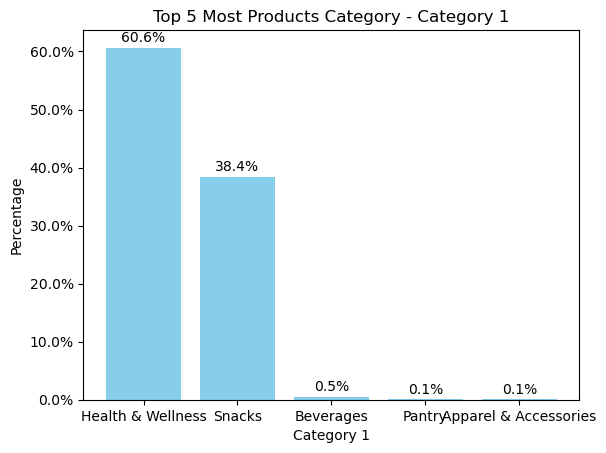

In [32]:
# Data Visualization to show top 5 categories
top5_category1=category1_pct.nlargest(5,'Percentage') # Get top 5 categories
plt.bar(top5_category1.index, top5_category1['Percentage'], color='skyblue') # Bar chart

for index, value in enumerate(top5_category1['Percentage']):
    plt.text(index, value + 1, f"{top5_category1['Percentage'][index]:.1f}%", ha='center')
    
def to_percent(y, _):
    return f'{y:.1f}%' 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.xlabel('Category 1')
plt.ylabel('Percentage')
plt.title('Top 5 Most Products Category - Category 1')

In [24]:
category2_pct=product_nodup['CATEGORY_2'].value_counts()/len(product_nodup)*100
category2_pct
## Category 2 is still relatively imformative, consider there's only 16% missing value.

CATEGORY_2
Candy                      14.301752
Hair Care                  13.187877
Medicines & Treatments     11.724791
Bath & Body                 9.637458
Skin Care                   7.403438
                             ...    
Games                       0.000118
Vehicle Storage & Cargo     0.000118
Audio                       0.000118
Pasta & Noodles             0.000118
Baby Transport              0.000118
Name: count, Length: 121, dtype: float64

C:\Users\YufeiLu\AppData\Local\Temp\ipykernel_19872\2046509516.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, value + 1, f"{top5_category2['Percentage'][index]:.1f}%", ha='center')


(0.0, 19.301751845713603)

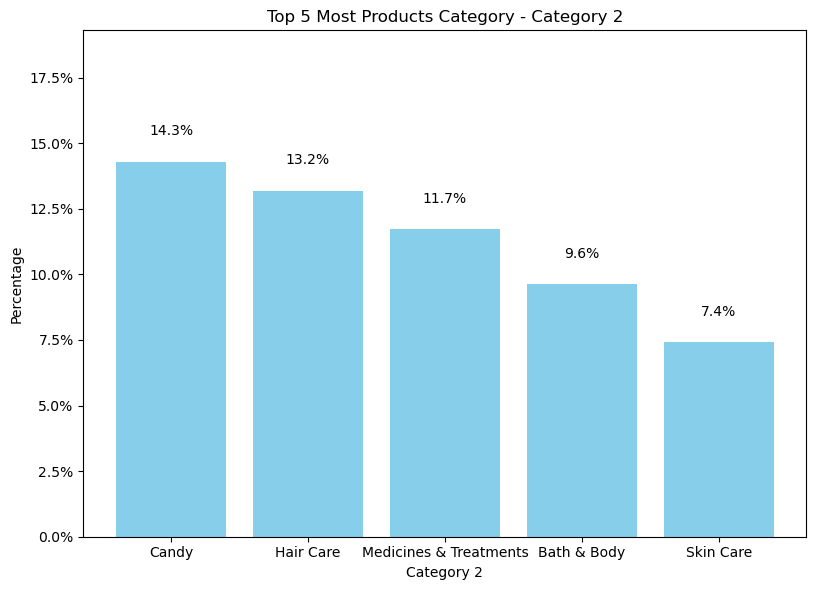

In [33]:
# Convert to dataframe
category2_pct=pd.DataFrame(category2_pct)
category2_pct.columns=['Percentage']
# Data Visualization to show top 5 categories
top5_category2=category2_pct.nlargest(5,'Percentage') # Get top 5 categories
plt.figure(figsize=(8,6))
plt.bar(top5_category2.index, top5_category2['Percentage'], color='skyblue') # Bar chart

for index, value in enumerate(top5_category2['Percentage']):
    plt.text(index, value + 1, f"{top5_category2['Percentage'][index]:.1f}%", ha='center')

plt.xlabel('Category 2')
plt.ylabel('Percentage')
plt.title('Top 5 Most Products Category - Category 2')
plt.tight_layout()
def to_percent(y, _):
    return f'{y:.1f}%' 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylim(0, category2_pct['Percentage'].max() + 5)

## Category 2 is more spread out -- there's no an outstanding category that has the most products.

In [24]:
# Brand and Manufacture information are missing 26% values. I would prefer to more informative variables.

# Write cleaned dataframe to csv and save

In [27]:
# Gets the current working directory
original_path = os.getcwd()  

# Write DataFrame to CSV in the original path
product.to_csv(os.path.join(original_path, 'product.csv'), index=False)

# Insights
1. 60% of products are in Health & Wellness category.
2. Category 2 is more spread out, there is no an outstanding category that has the most products.
# Issue
1. The datatypes are not very accurate.
2. 26.7% of the values are missing in Manufacturer and Brand and 92% of the values are missing in  Category 4. What's the definition of Category 4 and do we still need this variable?
3. Probably need to solve the missing values first if we are interested in the brand/manufacturer information,